Diamond Price Prediction

Introduction About the Data

The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id) :

.id : unique identifier of each diamond 

. carat : Carat(ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

. cut : Quality of Diamond Cut.

.color : Color of Diamond.

.clarity : Diamond clarity is a measure of the purity and rarity of the stone ,graded by the visibility of these characteristics under
10-power magnification.

. depth : The depth of diamond is its height (in milimeters) measured from the culet (bottom tip) to the table (flat, top surface)

.table : A diamond's table is the facet which can be seen when the stone is viewed face up.

.x : Diamond X dimension.

.y : Diamond Y dimension.

.z : Diamond Z dimension.



Target variable :

     . Price : Price of the given Diamond.

Dataset Source Link :  https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
### No missing values in the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       65535 non-null  int64  
 1   carat    65535 non-null  float64
 2   cut      65535 non-null  object 
 3   color    65535 non-null  object 
 4   clarity  65535 non-null  object 
 5   depth    65535 non-null  float64
 6   table    65535 non-null  float64
 7   x        65535 non-null  float64
 8   y        65535 non-null  float64
 9   z        65535 non-null  float64
 10  price    65535 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 5.5+ MB


In [6]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
## Lets drop the id column

df=df.drop(labels=['id'],axis=1)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
## check for duplicated records

df.duplicated().sum()

0

In [10]:
## Segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns :",numerical_columns)
print("Categorical columns :",categorical_columns)



Numerical columns : Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns : Index(['cut', 'color', 'clarity'], dtype='object')


In [11]:
df[categorical_columns].describe()

,cut,color,clarity
count,65535,65535,65535
unique,5,7,8
top,Ideal,G,SI1
freq,31404,14936,18029


In [12]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,65535.00000,65535.000000,65535.000000,65535.00000,65535.000000,65535.000000,65535.000000
mean,0.79120,61.816847,57.223108,5.71584,5.720643,3.534304,3977.980636
std,0.46367,1.085029,1.919165,1.11186,1.104957,0.687380,4046.247077
min,0.20000,52.100000,49.000000,3.77000,3.720000,0.000000,326.000000
25%,0.40000,61.300000,56.000000,4.70000,4.700000,2.900000,945.500000
50%,0.70000,61.900000,57.000000,5.71000,5.720000,3.530000,2410.000000
75%,1.03000,62.400000,58.000000,6.51000,6.510000,4.030000,5429.500000
max,3.40000,69.900000,70.000000,9.43000,10.010000,8.180000,18818.000000


In [13]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [14]:
df['cut'].nunique()

5

In [15]:
df['cut'].value_counts()

cut
Ideal        31404
Premium      16735
Very Good    12721
Good          3982
Fair           693
Name: count, dtype: int64

In [16]:
df['color'].value_counts()

color
G    14936
E    12064
F    11677
H    10491
D     8239
I     5970
J     2158
Name: count, dtype: int64

In [17]:
df['clarity'].value_counts()

clarity
SI1     18029
VS2     16300
VS1     10320
SI2     10221
VVS2     5372
VVS1     3611
IF       1501
I1        181
Name: count, dtype: int64

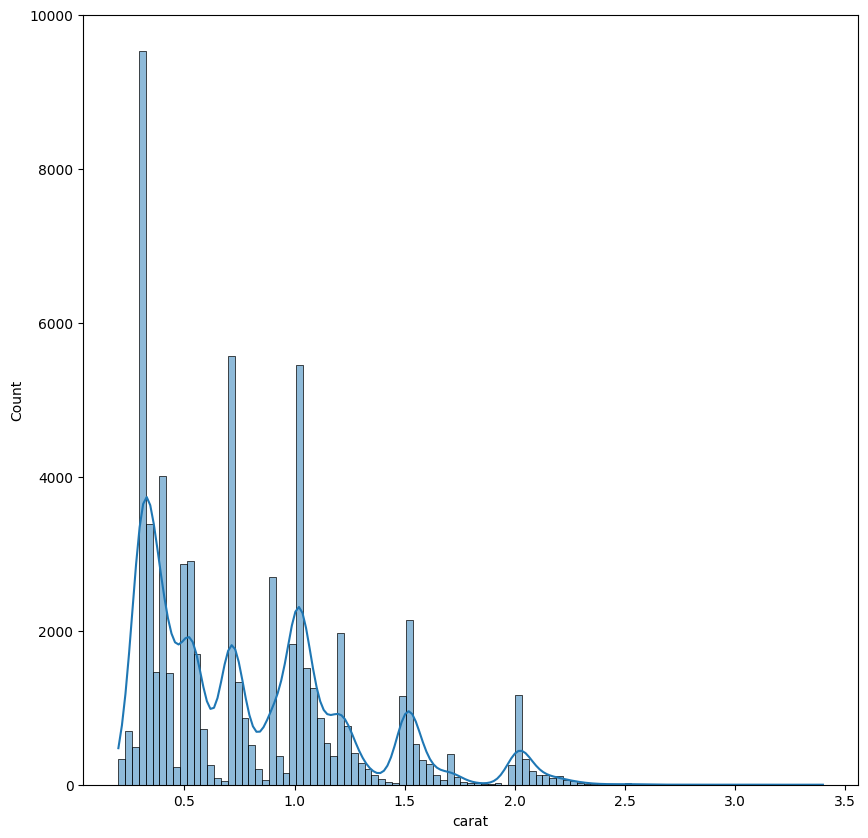

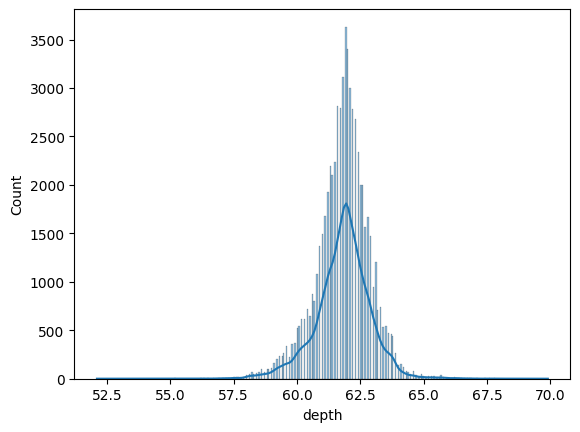

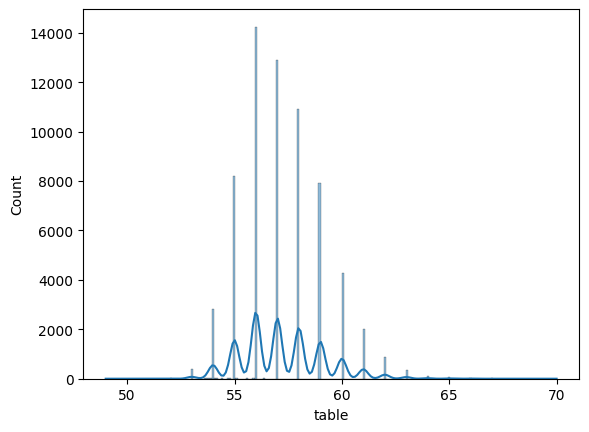

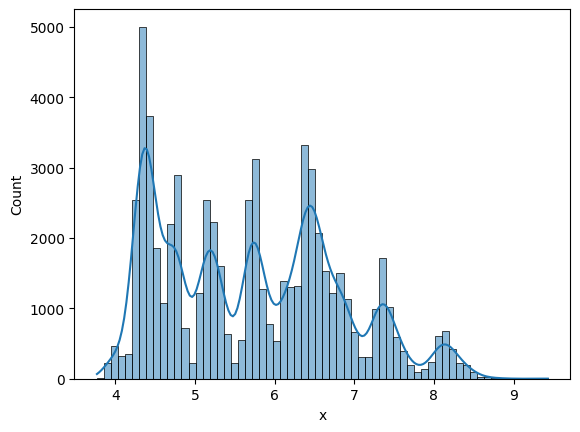

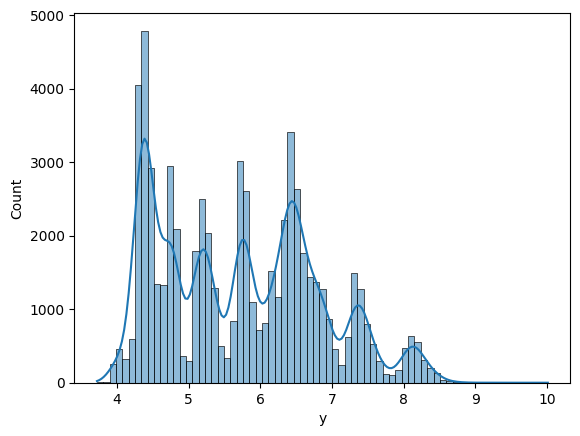

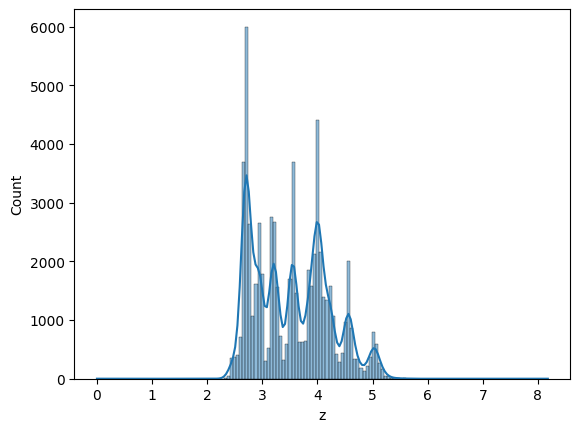

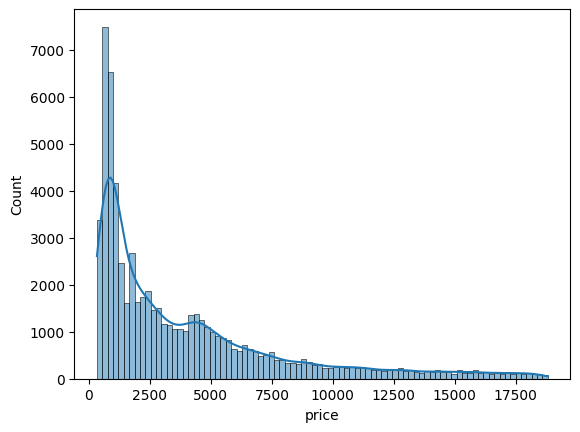

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

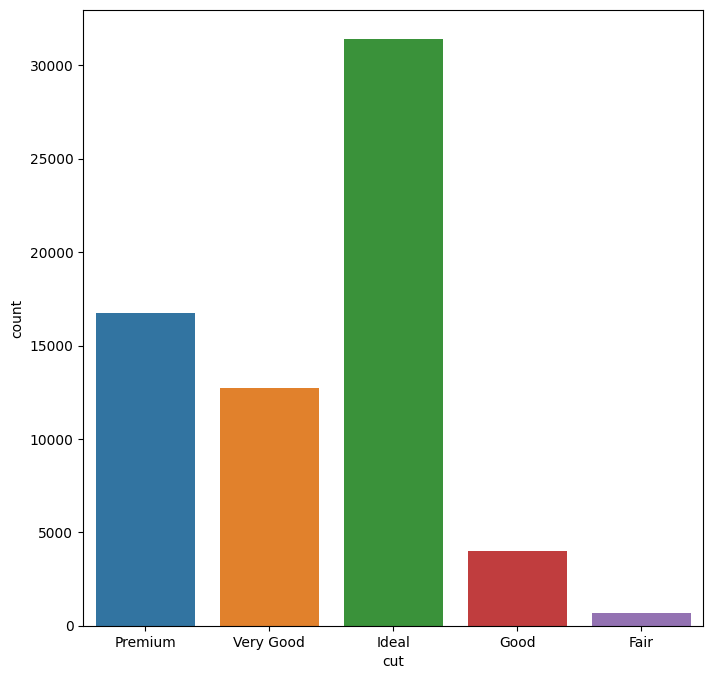

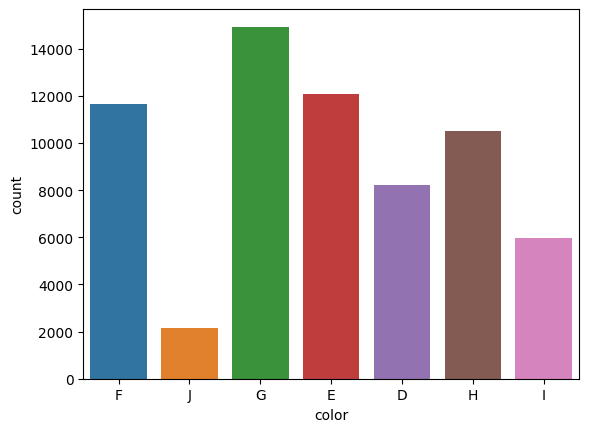

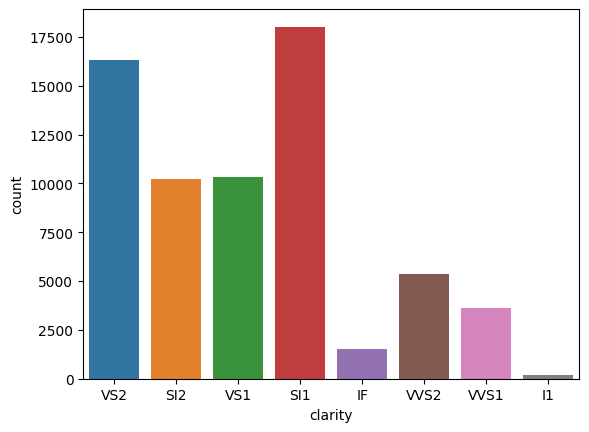

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
x=1
for i in categorical_columns:
    sns.countplot(data=df, x=i)
    print("\n")
    plt.show()


<Axes: >

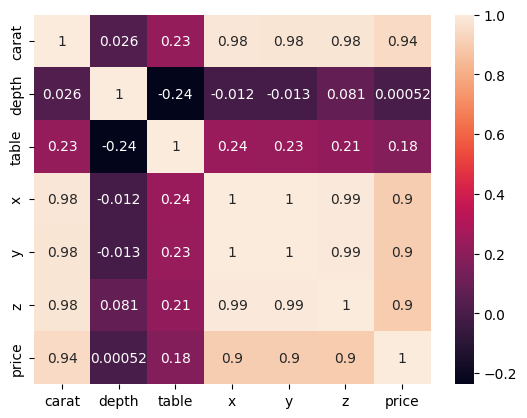

In [20]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [21]:
## Currently we will not execute

#df.drop(labels=['x','y','z'],axis=1)

In [22]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [23]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [24]:
cut_map={"Fair":1,"Good":2,"Ideal":3,"Very Good":4,"Premium":5}

In [25]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [26]:
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [27]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [28]:
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [29]:
df['cut']=df['cut'].map(cut_map)

In [30]:
df['clarity']=df['clarity'].map(clarity_map)

In [31]:
df['color']=df['color'].map(color_map)

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,5,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,3,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,3,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,5,4,4,62.6,59.0,7.65,7.61,4.77,14453
